In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
tf.math.sqrt(36.0)

2022-08-12 09:39:45.651931: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-08-12 09:39:47.534097: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-12 09:39:47.541585: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-12 09:39:47.576013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-12 09:39:47.576179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 268.26GiB/s
2022-08-12 09:39:47.576214: I tensorflow/stream_executor/platform/

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [8]:
path1 = "logs/exp-MNET_V2_224_BASE_LATEST/loss.csv"
path2 = "logs/_exp-MNET_V2_224_BASE_LATEST/loss.csv"
#path2 = "logs/exp-MNET_V2_160_MUL_SIG_5110/loss.csv"
path3 = "logs/exp-D103_1/loss.csv"

In [9]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
#df3 = pd.read_csv(path3)
cols = df2.columns

In [10]:
df1.tail(15)

,Epoch,iou_loss,conf_loss,prob_loss,det_loss,val_iou_loss,val_conf_loss,val_prob_loss,val_det_loss
0,0,8.138720,7.189119,24.999117,25.327486,8.012440,6.056312,18.979872,21.660689
1,1,7.722439,5.731323,19.716787,21.340477,7.645677,5.474788,17.612806,20.165577
2,2,7.420513,5.100078,16.395950,19.078971,7.486798,5.018266,15.829839,18.837008
3,3,7.262906,4.832157,14.908108,18.058307,7.346408,4.871049,15.092323,18.254402
4,4,7.162924,4.664859,13.935442,17.401960,7.317907,4.780109,14.657058,17.960847
5,5,7.081374,4.541059,13.198473,16.901822,7.261216,4.696033,14.318547,17.684663
6,6,7.022507,4.444889,12.592256,16.504299,7.240983,4.695819,14.131784,17.589513
7,7,6.970920,4.367171,12.105283,16.180204,7.209865,4.660301,14.135003,17.524178
8,8,6.936835,4.303400,11.688455,15.915617,7.184267,4.645589,14.437156,17.604731
9,9,6.897354,4.248504,11.324969,15.675846,7.180935,4.644007,14.122519,17.473939


In [11]:
df2.tail(15)

,Epoch,iou_loss,conf_loss,prob_loss,det_loss,val_iou_loss,val_conf_loss,val_prob_loss,val_det_loss
5,5,7.073664,4.532859,13.133660,16.859987,7.251709,4.724141,14.444906,17.753806
6,6,7.016508,4.437546,12.550539,16.474270,7.225408,4.687167,14.231233,17.605067
7,7,6.962477,4.357327,12.068924,16.147374,7.211052,4.668532,14.200802,17.559903
8,8,6.924580,4.294205,11.653021,15.879993,7.205310,4.662647,14.199303,17.547675
9,9,6.891525,4.239513,11.311063,15.655464,7.173632,4.648997,14.156881,17.485391
10,10,6.860817,4.189743,10.988482,15.445954,7.163406,4.631660,14.180950,17.467431
11,11,6.832404,4.144828,10.683936,15.250807,7.155978,4.667036,14.382483,17.576005
12,12,6.811868,4.105135,10.414316,15.082730,7.145134,4.646183,13.938239,17.366600
13,13,6.792475,4.067929,10.172604,14.929446,7.157441,4.629713,13.801881,17.307922
14,14,6.775047,4.036999,9.947911,14.791210,7.182190,4.674436,13.970259,17.444737


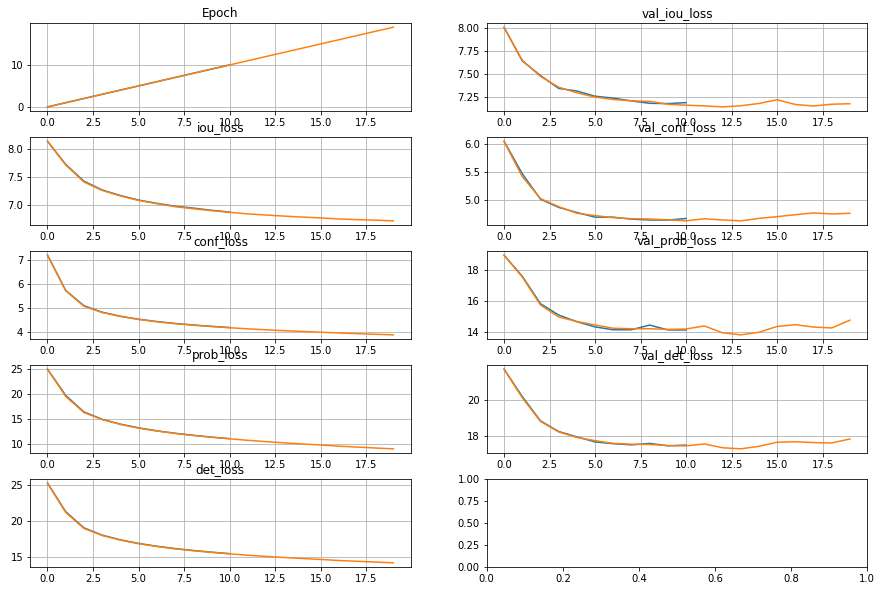

In [12]:
fig,axes = plt.subplots(nrows=5,ncols =2,figsize=(15,10))
plt.subplots_adjust(hspace=0.3)
for ind,col in enumerate(cols):
    try: axes[ind%5,ind//5].plot(df1[col])
    except : 0
    axes[ind%5,ind//5].plot(df2[col])
    #axes[ind%5,ind//5].plot(df3[col])
    
    axes[ind%5,ind//5].set_title(col)
    axes[ind%5,ind//5].grid()

In [7]:
path = "logs/exp-LITE_224_V31_105_0005/loss_rate_matrix.csv"
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/exp-LITE_224_V31_105_0005/loss_rate_matrix.csv'

In [ ]:
alpha = 0.2
rows  = 224
url          = 'https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/'
model_name   = ('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_' +str(float(alpha)) + '_' + str(rows) + '.h5')
weight_path  = url + model_name
#weights_path = data_utils.get_file(model_name, weight_path, cache_subdir='models')

In [ ]:
weight_path

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
H = W = 160
model = MobileNetV2(
    input_shape=(H,W,3),
    alpha=0.5,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
H = W = 160
model = MobileNetV2(
    input_shape=(H,W,3),
    alpha=0.5,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
)
#model.load_weights(f'model_data/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_0.5_{H}.h5')
model.save(f'model_data/mobilenet_v2_0.5_{H}_mod.h5')

In [ ]:
#model.summary()

In [ ]:
fig = plt.figure(figsize=(20,4))
plt.plot(df.loc[2000:,'0'])
plt.plot(df.loc[2000:,'1'])

In [ ]:
import pandas as  pd
import numpy as np
path = "E:/Deep-Learning-For-Robotics/DeepDetect-aux/logs/exp-321/loss_rate_matrix.csv"
df = pd.read_csv(path)

In [ ]:
#!pip install dnspython
import dns.resolver
  
# Finding A record
result = dns.resolver.query('geeksforgeeks.org', 'A')
  
# Printing record
for val in result:
    print('A Record : ', val.to_text())

In [ ]:
from matplotlib import pyplot as plt

def norm(x):
    _mean = x.mean()
    _min = x.min()
    _max = x.max()
    x = x/_max
    return x

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def prep(x):
    x = norm(x)
    x = moving_average(x,50)
    return x

fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(20,16))
A = 1000; B= 5000
axes[0].plot(prep(df.det_loss[A:B]))
axes[0].plot(prep(df.det_std[A:B]))


axes[1].plot(prep(df.seg_loss[A:B]))
axes[1].plot(prep(df.seg_std[A:B]))

det_ratio = prep(df.det_std[A:B]/df.det_loss[A:B])
seg_ratio = prep(df.seg_std[A:B]/df.seg_loss[A:B])
axes[2].plot(det_ratio)
axes[2].plot(seg_ratio)
axes[2].plot(seg_ratio/det_ratio)

axes[3].plot(prep(df.det_loss[A:B]))
axes[3].plot(prep(df.seg_loss[A:B]))

#axes[3].plot(prep(df.det_std[A:B]))
#axes[3].plot(prep(df.seg_std[A:B]))

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import trange
import numpy as np

In [ ]:
path1 = "E:/Deep-Learning-For-Robotics/DeepDetect-aux/logs/exp-331/sample_loss_det.csv"
df1 = pd.read_csv(path1)
path2 = "E:/Deep-Learning-For-Robotics/DeepDetect-aux/logs/exp-331/sample_loss_seg.csv"
df2 = pd.read_csv(path2)
def norm(x):
    _mean = x.mean()
    _min = x.min()
    _max = x.max()
    x = x/_max
    return x

def mva(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def prep(x):
    #x = norm(x)
    #x = moving_average(x,50)
    return x
confs1 =[]
confs2 =[]
#for i in range(1834,len(df),1833):
def calc_stats(_df,_m):
    means=[]
    stds=[]
    for i in trange(1833,len(_df)):
        #fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(20,4))
        cols = df1.columns[1:]
        _mean   = _df.loc[i-100:i,cols].mean()
        losses  = _df.loc[i,cols]/_m #/ _mean
        means   += [losses.mean()]
        stds    += [losses.std()]
    means = np.array(means)
    stds = np.array(stds)
    ratio = means/stds
    return means,stds,ratio

In [ ]:
m1,m2 = df1.loc[:1833:,df1.columns[1:]].values.mean(), df2.loc[:1833,df2.columns[1:]].values.mean()
det_mean,det_std,det_ratio = calc_stats(df1,m1)
seg_mean,seg_std,seg_ratio = calc_stats(df2,m2)

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,3))
axes[0].plot(mva(det_mean,1))
axes[0].plot(mva(det_mean,100))

axes[1].plot(mva(det_std,1))
axes[1].plot(mva(det_std,100))

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,3))
axes[0].plot(mva(seg_mean,1))
axes[0].plot(mva(seg_mean,100))


axes[1].plot(mva(seg_std,1))
axes[1].plot(mva(seg_std,100))


fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,3))
std_ratio = seg_mean/det_mean
axes[0].plot(mva(std_ratio,1))
axes[0].plot(mva(std_ratio,100))

std_ratio = seg_std/det_std
axes[1].plot(mva(std_ratio,1))
axes[1].plot(mva(std_ratio,100))
plt.show()


#plt.plot(stds)

In [ ]:
plt.plot(np.array(confs1)/np.array(confs2))

In [ ]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import trange
import numpy as np

path1 = "E:/Deep-Learning-For-Robotics/DeepDetect-aux/logs/exp-341/sample_loss_det.csv"
df1 = pd.read_csv(path1)
path2 = "E:/Deep-Learning-For-Robotics/DeepDetect-aux/logs/exp-341/sample_loss_seg.csv"
df2 = pd.read_csv(path2)
def norm(x):
    _mean = x.mean()
    _min = x.min()
    _max = x.max()
    x = x/_max
    return x

def mva(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def prep(x):
    #x = norm(x)
    #x = moving_average(x,50)
    return x
confs1 =[]
confs2 =[]
#for i in range(1834,len(df),1833):
def calc_stats(_df1,_df2):
    csims=[]
    stds =[]
    kls  =[]
    vis =0
    for i in trange(0,1000):
        cols = df1.columns[1:]
        smp1 = _df1.loc[i,cols]
        smp_loss1 = smp1 / smp1.max()
        y1, x1 = np.histogram(smp_loss1)
        x1 = x1[:-1]
        
        smp2 = _df2.loc[i,cols]
        smp_loss2 = smp2 / smp2.max()
        y2, x2 = np.histogram(smp_loss2)
        x2 = x2[:-1]
        if vis:
            fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,3))
            axes[0].plot(smp_loss1)
            axes[0].plot(smp_loss2)
            axes[0].set_xticks(range(0,64,4))
            #axes[0].set_xticklabels(range(0,64,4),rotation=90)

            axes[1].plot(x1,y1)
            #axes[1].plot(x1,np.log2(y1+0.0001))
            axes[1].plot(x2,y2)
            #plt.show()
        smp_loss1 = np.array(smp_loss1.values,dtype=np.float32)
        smp_loss2 = np.array(smp_loss2.values,dtype=np.float32)
        csim = -tf.keras.losses.CosineSimilarity()(smp_loss1,smp_loss2).numpy()
        csims+=[csim]
        std = smp_loss2.std()/smp_loss1.std()
        stds+=[std]
        kl = tf.keras.losses.KLDivergence()(smp_loss1,smp_loss2).numpy()
        kls +=[kl]
        #print(csim)
    return csims,stds, kls

In [ ]:
#_,_,_=calc_stats(df1,df2)
csims,stds,kls = calc_stats(df1,df2)

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(csims[:10000],alpha = 0.5)
plt.plot(mva(csims[:10000],100))
plt.grid()

In [ ]:
fig = plt.figure(figsize=(20,6))
plt.plot(kls[:10000],alpha = 0.5)
plt.plot(mva(kls[:10000],100))
plt.grid()

In [ ]:
cc = mva(csims[:],1)
kk = mva(kls[:],1)

In [ ]:
fig,axes= plt.subplots(nrows=3,ncols=1,figsize=(15,10))
axes[0].plot(norm(cc))
axes[0].grid()
axes[1].plot(1- kk/100)
axes[1].grid()
axes[2].plot(norm(cc))
axes[2].plot(norm(kk))
axes[2].grid()

In [ ]:
kk.max(), kk.min()

In [ ]:
fig = plt.figure(figsize=(20,6))
plt.plot(stds[:10000],alpha = 0.5)
plt.plot(mva(stds[:10000],100))
plt.grid()

In [ ]:
def df_to_table(_df):
    cols = _df.columns.tolist()
    table_str = []
    color_str = [['lightgray']*len(cols)]*len(_df)
    color_str = np.array(color_str,dtype=np.object)
    color_str[:,0] = 'lightsalmon'
    col_widths = [0.1]+[0.3]*(len(_df.columns)-1)
    def func(x):
        x = round(x,4)
        x = str(x)
        return x
    for ind,row in _df.iterrows():
        table_str += [list(map(func,row))]
        
    fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(25,10))
    tbl = axes.table(table_str,
                     bbox=[0,0,1,1],
                     cellColours=color_str,
                     colColours=['lightblue']*len(cols),
                     colLabels=_df.columns.tolist(),
                     colWidths=col_widths)
    axes.axis('tight')
    axes.axis('off')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(14)
    return tbl,fig

In [ ]:
df_to_table(df1)
#df_to_table(df2)

In [ ]:
import cv2
img = cv2.imread('sat-map.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
label = np.ones((64,32,32,80))

In [ ]:
label[:,:,:,super_cats[cat]].max(axis=-1).shape

In [ ]:
super_cats

In [ ]:
!cp -r ../DeepDetect-aux/*py ../../Deep-Learning-For-Robotics-I/DeepDetect-aux/
!cp -r ../DeepDetect-aux/*ipynb ../../Deep-Learning-For-Robotics-I/DeepDetect-aux/
!cp -r ../DeepDetect-aux/*sh./../Deep-Learning-For-Robotics-I/DeepDetect-aux/
!cp -r ../DeepDetect-aux/yolo ../../Deep-Learning-For-Robotics-I/DeepDetect-aux/
!cp -r ../DeepDetect-aux/applications ../../Deep-Learning-For-Robotics-I/DeepDetect-aux/

!cd ../ && git add DeepDetect-aux/*ipynb
!cd git add DeepDetect-aux/*py
!cd git add DeepDetect-aux/yolo
!cd git add DeepDetect-aux/*sh
!cd git commit -m "saving working code - v1.0"
!cd git push origin master

!cd ../../Deep-Learning-For-Robotics-I/ && git add DeepDetect-aux/*ipynb
!cd ../../Deep-Learning-For-Robotics-I/ && git add DeepDetect-aux/applications/*py
!cd ../../Deep-Learning-For-Robotics-I/ && git add DeepDetect-aux/*py
!cd ../../Deep-Learning-For-Robotics-I/ && git add DeepDetect-aux/yolo
!cd ../../Deep-Learning-For-Robotics-I/ && git add DeepDetect-aux/*sh
!cd ../../Deep-Learning-For-Robotics-I/ && git commit -m "saving progress"
!cd ../../Deep-Learning-For-Robotics-I/ && git push origin master

In [ ]:
#!cd ../../Deep-Learning-For-Robotics-I/ && git pull origin master

In [ ]:
import tensorflow as tf


In [ ]:
__version__ = 1.0

In [ ]:
__version__

In [ ]:
tf.nn.sigmoid(0.0)

In [ ]:
import tensorflow as tf
output_size = 5
batch_size = 3
y = tf.range(output_size, dtype=tf.int32)
y = tf.expand_dims(y, -1)
y = tf.tile(y, [1, output_size])
x = tf.range(output_size,dtype=tf.int32)
x = tf.expand_dims(x, 0)
x = tf.tile(x, [output_size, 1])

xy_grid = tf.concat([x[:, :, tf.newaxis], y[:, :, tf.newaxis]], axis=-1)
xy_grid = tf.tile(xy_grid[tf.newaxis, :, :, tf.newaxis, :], [batch_size, 1, 1, 3, 1])
xy_grid = tf.cast(xy_grid, tf.float32)

 Calculate the center position of the prediction box:
pred_xy = (tf.sigmoid(conv_raw_dxdy) + xy_grid) * STRIDES[i]
# Calculate the length and width of the prediction box:
pred_wh = (tf.exp(conv_raw_dwdh) * ANCHORS[i]) * STRIDES[i]


In [ ]:
import numpy as np

In [ ]:
np.log(np.array([-1,0,1,2,3])+np.array([0,1,0,0,0]))

In [ ]:
np.exp(0.0000000001)

In [ ]:
box1 = [0,0,10,10]
box2 = [5,5,15,15]

In [ ]:
def bbox_iou(box1, box2, xywh=True, GIoU=False, DIoU=False, CIoU=False, eps=1e-7):
    # Returns Intersection over Union (IoU) of box1(1,4) to box2(n,4)

    # Get the coordinates of bounding boxes
    if xywh:  # transform from xywh to xyxy
        (x1, y1, w1, h1), (x2, y2, w2, h2) = box1.chunk(4, 1), box2.chunk(4, 1)
        w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
        b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
        b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_
    else:  # x1, y1, x2, y2 = box1
        b1_x1, b1_y1, b1_x2, b1_y2 = box1.chunk(4, 1)
        b2_x1, b2_y1, b2_x2, b2_y2 = box2.chunk(4, 1)
        w1, h1 = b1_x2 - b1_x1, b1_y2 - b1_y1 + eps
        w2, h2 = b2_x2 - b2_x1, b2_y2 - b2_y1 + eps

    # Intersection area
    inter = (torch.min(b1_x2, b2_x2) - torch.max(b1_x1, b2_x1)).clamp(0) * \
            (torch.min(b1_y2, b2_y2) - torch.max(b1_y1, b2_y1)).clamp(0)

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps

    # IoU
    iou = inter / union
    if CIoU or DIoU or GIoU:
        cw = torch.max(b1_x2, b2_x2) - torch.min(b1_x1, b2_x1)  # convex (smallest enclosing box) width
        ch = torch.max(b1_y2, b2_y2) - torch.min(b1_y1, b2_y1)  # convex height
        if CIoU or DIoU:  # Distance or Complete IoU https://arxiv.org/abs/1911.08287v1
            c2 = cw ** 2 + ch ** 2 + eps  # convex diagonal squared
            rho2 = ((b2_x1 + b2_x2 - b1_x1 - b1_x2) ** 2 + (b2_y1 + b2_y2 - b1_y1 - b1_y2) ** 2) / 4  # center dist ** 2
            if CIoU:  # https://github.com/Zzh-tju/DIoU-SSD-pytorch/blob/master/utils/box/box_utils.py#L47
                v = (4 / math.pi ** 2) * torch.pow(torch.atan(w2 / h2) - torch.atan(w1 / h1), 2)
                with torch.no_grad():
                    alpha = v / (v - iou + (1 + eps))
                return iou - (rho2 / c2 + v * alpha)  # CIoU
            return iou - rho2 / c2  # DIoU
        c_area = cw * ch + eps  # convex area
        return iou - (c_area - union) / c_area  # GIoU https://arxiv.org/pdf/1902.09630.pdf
    return iou  # IoU



In [ ]:
anc = [[[10,  14], [23,   27], [37,   58]],
[[81,  82], [135, 169], [344, 319]],
[[0,    0], [0,     0], [0,     0]]]

In [ ]:
import numpy as np
np.array(anc)/416.0

In [ ]:
[[[0.02403846, 0.03365385], [0.05528846, 0.06490385],[0.08894231, 0.13942308]],
[[0.19471154, 0.19711538], [0.32451923, 0.40625   ],[0.82692308, 0.76682692]],
[[0.        , 0.        ], [0.        , 0.        ],[0.        , 0.        ]]]

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
x = np.linspace(-1,2,100)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(x,(2*tf.sigmoid(x))**3.0)
plt.plot(x,tf.exp(x))

In [ ]:
import numpy as np

In [ ]:
np.ones((10))

In [ ]:
from matplotlib import pyplot as plt
for i in range(10):
    fig,axes = plt.subplots()
    x = np.arange(i,i+10)
    y = np.sin(x)
    plt.plot(x,y)
    plt.grid()

In [ ]:
import numpy as np
import zlib
arr = np.array([1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
out = np.array(arr,dtype=bool)

In [ ]:
of = np.array(arr,dtype=np.float16)

In [ ]:
from applications.mobilenet_v2_mod import MobileNetV2
N = int(16)
net = MobileNetV2(input_shape=(224,224,3),
    input_tensor=None,
    alpha=1.0,
    #include_top=False,
    weights='imagenet',
    pooling=None,
    NUM_CLASS=80,
    N=N,
    classifier_activation='softmax')

In [ ]:
net.build(input_shape=(None,224,224,3))
net.summary()

In [ ]:
a = [1,2,3][::-1]

In [ ]:
a